<h1 align='center'> <b>Data Analysis & Stats</b> </h1>

## ***Libreries***



- <a href="https://pandas.pydata.org/"><img src="https://pandas.pydata.org/docs/_static/pandas.svg" style='height:70px'/></a>
- <a href="https://matplotlib.org/"><img src="https://matplotlib.org/stable/_static/logo2.svg" style='height:50px'/></a>

## ***Language***

- <a href="https://www.python.org/"><img src="https://www.python.org/static/img/python-logo.png" style='height:50px'>

## **Manejo de archivos** 

### ***Imports necesarios***

In [63]:
import pandas as pd     
import matplotlib.pyplot as plt
import os 

### ***Obtengo la ruta donde se almacena el archivo CSV***

In [64]:
FOLDER_PATH = os.path.abspath('..')
EVENTS_PATH =  os.path.join(FOLDER_PATH,'src','database','events','events.csv') 
USERS_JSON_PATH = os.path.join(FOLDER_PATH,'src','database','saves','users.json')

### ***Leo el archivo y lo convierto en Data Frame***

In [65]:
if not os.path.exists(EVENTS_PATH):
    data_frame = pd.DataFrame(columns= ["timestamp","id","evento","cantidad a adivinar","usuarie","estado","texto ingresado","respuesta","nivel"])
    print('No se encontro ningun registro de partidas...')
else:   
    DATA_FRAME = pd.read_csv(EVENTS_PATH,encoding='utf-8')
DATA_FRAME.head()

,timestamp,id,usuarie,genero,nivel,cantidad a adivinar,evento,estado,correcta,respuesta
0,1.655595e+09,7a7483ca51dc463e929c7137e9677e73,Lucas,Man,Personalizada,3,inicio_partida,NaN,NaN,NaN
1,1.655595e+09,7a7483ca51dc463e929c7137e9677e73,Lucas,Man,Personalizada,3,intento,error,Mauro Arambarri,Sebastian Holmén
2,1.655595e+09,7a7483ca51dc463e929c7137e9677e73,Lucas,Man,Personalizada,3,intento,error,Mauro Arambarri,Ismail Ahmed
3,1.655595e+09,7a7483ca51dc463e929c7137e9677e73,Lucas,Man,Personalizada,3,intento,error,Mauro Arambarri,Ander Guevara
4,1.655595e+09,7a7483ca51dc463e929c7137e9677e73,Lucas,Man,Personalizada,3,intento,ok,Mauro Arambarri,Mauro Arambarri


### ***Informacion sobre el Data Frame***

In [66]:
DATA_FRAME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            149 non-null    float64
 1   id                   149 non-null    object 
 2   usuarie              149 non-null    object 
 3   genero               149 non-null    object 
 4   nivel                149 non-null    object 
 5   cantidad a adivinar  149 non-null    int64  
 6   evento               149 non-null    object 
 7   estado               138 non-null    object 
 8   correcta             127 non-null    object 
 9   respuesta            127 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.8+ KB


## **Empezamos a graficar**

### Gráfico que muestre el porcentaje de partidas finalizadas según género

- ***No quedamos con los datos que nos interesan***

In [67]:
sub_df_genders = DATA_FRAME.loc[:,["genero","estado"]]

- ***Aplicacamos title case, para no poseer invovenientes a la hora de procesar los generos.***

- ***Filtramos la información de estado para obtener las partidas finalizadas***

In [68]:
sub_df_genders['genero'] = sub_df_genders['genero'].apply(lambda genero: genero.title())
sub_df_genders = sub_df_genders[sub_df_genders['estado']=='finalizada']

- ***Obtenos los generos y sus respectivos valores***



In [69]:
cant_x_gender = sub_df_genders['genero'].value_counts()

- **Graficamos**
- Parametros - ***Gráfico tipo Pie***
  - startangle = Define el angulo del grafico en 90°.
  - shadow = Agrega sombra al grafico.
  - bbox_to_anchor = Posiciona fuera del grafico sus respectivas leyendas.
  - wedgeprops = Por medio de un diccionarios personalizamos el grafico.
  - autopct= Agrega el valor porcentual del los datos. 
    (**% = indica que de tipo porcentual**,
    **0.1 = indica la cantidad de decimales agregados**,
    **f = para darle formato porcentul** )

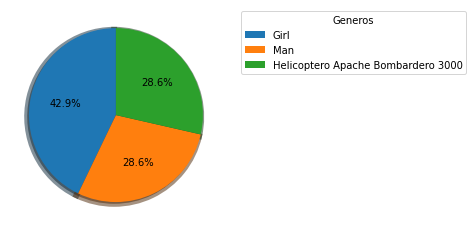

In [70]:
plt.pie(cant_x_gender.values,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%0.1f%%')
plt.legend(cant_x_gender.index,title='Generos',bbox_to_anchor=(1.05,1),)
plt.show()

### Gráfico que muestre el porcentaje de partidas finalizadas según género

- ***No quedamos con los datos que nos interesan***

In [71]:
sub_df_difficulty = DATA_FRAME.loc[:,["nivel","estado"]]

- ***Filtramos la información de estado para obtener las partidas finalizadas***

In [72]:
sub_df_difficulty = sub_df_difficulty[sub_df_difficulty['estado'] == 'finalizada']

- ***Obtenos los niveles de dificuldad y sus respectivos valores***



In [73]:
cant_x_difficulty = sub_df_difficulty['nivel'].value_counts()

- **Graficamos**
- Parametros - ***Gráfica tipo Pie***
  - startangle = Define el angulo del grafico en 90°.
  - shadow = Agrega sombra al grafico.
  - bbox_to_anchor = Posiciona fuera del grafico sus respectivas leyendas.
  - wedgeprops = Por medio de un diccionarios personalizamos el grafico.
  - autopct= Agrega el valor porcentual del los datos. 
    (**% = indica que de tipo porcentual**,
    **0.1 = indica la cantidad de decimales agregados**,
    **f = para darle formato porcentul** )

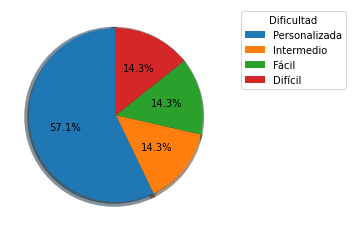

In [74]:
plt.pie(cant_x_difficulty.values,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%0.1f%%')
plt.legend(cant_x_difficulty.index,title='Dificultad',bbox_to_anchor=(1.05,1),)
plt.show()

### Promedio de tiempo de partida general

In [87]:
startings = []
endings = []
for partida in DATA_FRAME.values:
    if partida[6] == 'inicio_partida':
        startings.append( partida[0])
    elif partida[6] == 'fin':
        endings.append(partida[0])
game_times = []
for start,end in zip(startings,endings):
    game_times.append((end - start)) 
total_times = sum(game_times)
mean = (total_times / len(game_times))

print(f'{round(mean,2)} sugundos es el tiempo promedio que dura una partida')

12.31 sugundos es el tiempo promedio que dura una partida
